## Using XGBoost for Breast Cancer Classification

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import metrics

In [12]:
cancer = load_breast_cancer()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)

In [14]:
learning_rates =[x * 0.004 for x in range(1, 61)]
training_accuracy = []
test_accuracy = []
best_train_score = 0
best_test_score = 0
best_learning_rate = 0

## Iterating over several learning rates to find the best one

In [15]:
for r in learning_rates:

    #build the model
    model = XGBClassifier(learning_rate = r)

    model.fit(X_train, y_train)
    #record training set accuracy
    
    training_accuracy.append(model.score(X_train, y_train))
    best_train_score = max(best_train_score,model.score(X_train, y_train))
    #record generalization accuracy
    
    current_score = model.score(X_test, y_test)
    test_accuracy.append(current_score)
    if model.score(X_test, y_test) > best_test_score : 
        best_learning_rate = r
    best_test_score = max(best_test_score,model.score(X_test, y_test))

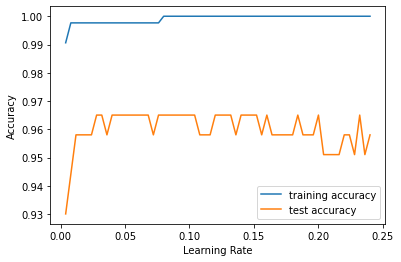

In [16]:
plt.plot(learning_rates, training_accuracy, label="training accuracy")
plt.plot(learning_rates, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.legend()
plt.show()

## Performance Metrics

In [33]:
model = XGBClassifier(learning_rate = best_learning_rate)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy = ",model.score(X_test, y_test))
print("ROC_AUC score = ",metrics.roc_auc_score(y_test,y_pred))
print("F1 score = ", metrics.f1_score(y_test,y_pred))
print("Confision Matrix : ")
print(metrics.confusion_matrix(y_test,y_pred))
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)

Accuracy =  0.965034965034965
ROC_AUC score =  0.9605870020964361
F1 score =  0.9723756906077348
Confision Matrix : 
[[50  3]
 [ 2 88]]


## AUC ROC curve

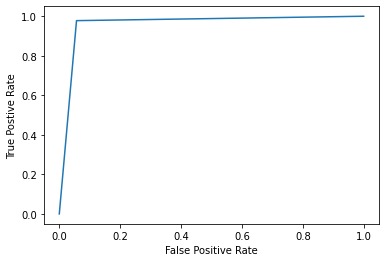

In [34]:
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.plot(fpr,tpr)